<a href="https://colab.research.google.com/github/cassiokawa/mlnd_capstone1/blob/master/BeatlesLyricsCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn
import os


'''
Testing using Beatles song catalog to use Baggle of Words, TF-IDF for NLP code
'''

'\nTesting using Beatles song catalog to use Baggle of Words, TF-IDF for NLP code\n'

In [2]:
# Pulling data from Kaggle
 !pip install -U -q kaggle
 !mkdir -p ~/.kaggle

from google.colab import files
files.upload()

        
 !cp kaggle.json ~/.kaggle/

Saving kaggle.json to kaggle.json


In [3]:
os.listdir()
!kaggle datasets list
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d cassiokawa/beatles-lyrics
!ls

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
xvivancos/transactions-from-a-bakery                     Transactions from a bakery                         113KB  2018-09-05 23:42:32           5847  
kmader/colorectal-histology-mnist                        Colorectal Histology MNIST                         991MB  2018-09-19 14:20:49            226  
olistbr/brazilian-ecommerce                              Brazilian E-Commerce Public Dataset by Olist        30MB  2018-10-25 19:46:13           2207  
center-for-policing-equity/data-science-for-good         Data Science for Good: Center for Policing Equity   43MB  2018-10-29 23:55:11           2010  
kmader/skin-cancer-mnist-ham10000                        Skin Cancer MNIST: HAM10000    

In [0]:
# Importing data with pandas
import pandas as pd
data2 = pd.read_csv('beatles-lyrics.zip', compression='zip', header=0, sep=',', quotechar='"')

In [5]:
# Import the dependencies
import numpy as np
import pandas as pd
import sys 
from keras.models import Sequential
from keras.layers import LSTM, Activation, Flatten, Dropout, Dense, Embedding, TimeDistributed, CuDNNLSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

Using TensorFlow backend.


In [6]:
from zipfile import ZipFile
zip_file = ZipFile('beatles-lyrics.zip')
fields= ['album', 'year','title','lyrics', 'cover', 'songwriters_parsed','vocals_parsed' ] 
#data2=pd.read_csv('beatles-lyrics.csv ',encoding='cp1252')
# data=pd.read_csv('beatles-lyrics.csv ',encoding='utf-8')

data2.head()

,title,album,year,lyrics,cover,songwriters_parsed,vocals_parsed
0,12-Bar Original,Anthology 2,1965,NaN,False,"[""John Lennon"", ""Paul McCartney"", ""George Harr...","[""Instrumental""]"
1,Across the Universe,Let It Be,1968,Words are flowing out like endless rain into a...,False,"[""John Lennon""]","[""Lennon""]"
2,Act Naturally,Help!,1965,They're gonna put me in the movies They're gon...,True,"[""Johnny Russell"", ""Voni Morrison""]","[""Starr""]"
3,Ain't She Sweet,Anthology 1,1961,"Oh aint she sweet, Well see her walking down t...",True,"[""Jack Yellen"", ""Milton Ager""]","[""Lennon""]"
4,All I've Got to Do,With the Beatles,1963,"Whenever I want you around, yeah. All I gotta ...",False,"[""John Lennon""]","[""Lennon""]"


In [0]:
dataset = data2
dataset.head()
dataset.describe()


# Quite a bit of data pre-processing before we can apply any NLP algo.  In order to create a text with all lyrics in one string it is necessary to concatenate the lines of each song.
# def concatLyrics(lyrics, songID, songNM, row):
def concatLyrics(lyrics):
    lyricas.append(row['lyrics'] + '\n')
#     songID.append( row['year']*100+ row['track_n'])
#     songNM.append(row['track_title'])
#     return lyrics,songID,songNM
    return lyrics



In [0]:
# create collections 

# songID = []
# songNM = []

# songNum indicates the song number in the dataset
songNum = 1

# i indicates the song number

# isFirstLine = True


In [9]:
# join sentences into lyrics 
i = 0
lyricas = []
for index, row in dataset.iterrows():
#     print(row['lyrics'])
    lyricas.append(row['lyrics'])

print(lyricas)

[nan, "Words are flowing out like endless rain into a paper cup, They slither while they pass, they slip away across the universe Pools of sorrow, waves of joy are drifting through my open mind, Possessing and caressing me. Jai guru deva om Nothing's gonna change my world, Nothing's gonna change my world, Nothing's gonna change my world, Nothing's gonna change my world. Images of broken light which dance before me like a million eyes, They call me on and on across the universe, Thoughts meander like a restless wind inside a letter box they Tumble blindly as they make their way Across the universe Jai guru deva om Nothing's gonna change my world, Nothing's gonna change my world, Nothing's gonna change my world, Nothing's gonna change my world. Sounds of laughter shades of light are ringing Through my open views inciting and inviting me Limitless undying love which shines around me like a Million suns, it calls me on and on Across the universe Jai guru deva om Nothing's gonna change my w

In [0]:
# Define a new pandas DataFrame to save songID , songNM , Lyrics in it to use them later
# lyrics_data = pd.DataFrame({'songID':songID, 'songNM':songNM, 'lyrics':lyrics })
lyrics_data = pd.DataFrame({'lyricas':lyricas })

# Now save the lyrics in a text file to use it in the LSTM RNN

# Save Lyrics in .txt file
with open('lyricsText.txt', 'w') as filehandle:  

# with open('lyricsText.txt', 'w',encoding="utf-8") as filehandle:  
    for listitem in lyricas:
        filehandle.write('%s\n' % listitem)


In [0]:
# Load the dataset and convert it to lowercase :
textFileName = 'lyricsText.txt'
# raw_text = open(textFileName, encoding = 'UTF-8').read()
raw_text = open(textFileName).read()

raw_text = raw_text.lower()


In [12]:
# Mapping chars to ints :
chars = sorted(list(set(raw_text)))
int_chars = dict((i, c) for i, c in enumerate(chars))
chars_int = dict((i, c) for c, i in enumerate(chars))


# Get number of chars and vocab in our text :
n_chars = len(raw_text)
n_vocab = len(chars)

print('Total Characters : ' , n_chars) # number of all the characters in lyricsText.txt
print('Total Vocab : ', n_vocab) # number of unique characters


Total Characters :  207928
Total Vocab :  56


In [13]:
# process the dataset:
seq_len = 100
data_X = []
data_y = []

for i in range(0, n_chars - seq_len, 1):
    # Input Sequeance(will be used as samples)
    seq_in  = raw_text[i:i+seq_len]
    # Output sequence (will be used as target)
    seq_out = raw_text[i + seq_len]
    # Store samples in data_X
    data_X.append([chars_int[char] for char in seq_in])
    # Store targets in data_y
    data_y.append(chars_int[seq_out])
n_patterns = len(data_X)
print( 'Total Patterns : ', n_patterns)


Total Patterns :  207828


In [0]:
# Reshape X to be suitable to go into LSTM RNN :
X = np.reshape(data_X , (n_patterns, seq_len, 1))
# Normalizing input data :
X = X/ float(n_vocab)
# One hot encode the output targets :
y = np_utils.to_categorical(data_y)


In [0]:
LSTM_layer_num = 4 # number of LSTM layers
layer_size = [256,256,256,256] # number of nodes in each layer


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
raw_text=[raw_text]
Xis = vectorizer.fit_transform(raw_text)
print(vectorizer.get_feature_names())

['15', '90', '909', 'aaaaaaaahhhh', 'aaaaaahhhhhh', 'aaaaah', 'aaaaahhhhhhhhhh', 'aaah', 'aah', 'abc', 'able', 'aboard', 'about', 'above', 'abrigado', 'accidents', 'aches', 'acorns', 'acquainted', 'across', 'act', 'acts', 'adicionar', 'admit', 'advice', 'affection', 'afraid', 'african', 'after', 'afternoon', 'again', 'age', 'aging', 'ago', 'agree', 'ah', 'aha', 'ahead', 'ahh', 'ahhhh', 'ahhhhhh', 'aids', 'ain', 'aint', 'air', 'al', 'albert', 'alerted', 'all', 'allan', 'alley', 'almost', 'alone', 'along', 'aloud', 'already', 'alrgiht', 'alright', 'also', 'although', 'always', 'am', 'american', 'among', 'amore', 'amsterdam', 'an', 'and', 'angel', 'angry', 'anna', 'annoyed', 'another', 'answer', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anywhere', 'apart', 'apologize', 'appear', 'appears', 'apple', 'apply', 'appointment', 'appreciate', 'are', 'aren', 'arise', 'arizona', 'armchair', 'arms', 'army', 'around', 'arrive', 'arrives', 'arriving', 'as', 'a

In [17]:
cloud_text = vectorizer.vocabulary_
print (vectorizer.vocabulary_)


{'nan': 1520, 'words': 2633, 'are': 91, 'flowing': 819, 'out': 1625, 'like': 1281, 'endless': 695, 'rain': 1812, 'into': 1119, 'paper': 1647, 'cup': 506, 'they': 2332, 'slither': 2085, 'while': 2578, 'pass': 1663, 'slip': 2084, 'away': 123, 'across': 19, 'the': 2324, 'universe': 2466, 'pools': 1742, 'of': 1588, 'sorrow': 2130, 'waves': 2543, 'joy': 1160, 'drifting': 645, 'through': 2353, 'my': 1512, 'open': 1612, 'mind': 1443, 'possessing': 1752, 'and': 67, 'caressing': 333, 'me': 1407, 'jai': 1135, 'guru': 946, 'deva': 568, 'om': 1596, 'nothing': 1568, 'gonna': 907, 'change': 365, 'world': 2639, 'images': 1088, 'broken': 284, 'light': 1277, 'which': 2576, 'dance': 523, 'before': 175, 'million': 1442, 'eyes': 736, 'call': 316, 'on': 1597, 'thoughts': 2348, 'meander': 1409, 'restless': 1854, 'wind': 2598, 'inside': 1111, 'letter': 1266, 'box': 264, 'tumble': 2434, 'blindly': 233, 'as': 102, 'make': 1370, 'their': 2325, 'way': 2544, 'sounds': 2134, 'laughter': 1237, 'shades': 1994, 'ring

In [0]:
!pip install -U -q wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

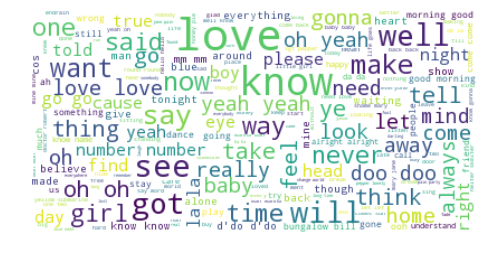

In [19]:
# Create and generate a word cloud image:

wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(raw_text[0]))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer()

In [0]:
model = Sequential()

In [0]:
model.add(CuDNNLSTM(layer_size[0], input_shape =(X.shape[1], X.shape[2]), return_sequences = True))

In [0]:
for i in range(1,LSTM_layer_num) :
    model.add(CuDNNLSTM(layer_size[i], return_sequences=True))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(y.shape[1]))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 100, 256)          265216    
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 100, 256)          526336    
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 100, 256)          526336    
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 100, 256)          526336    
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 56)                1433656   
_________________________________________________________________
activation_1 (Activation)    (None, 56)                0         
Total para

In [0]:
# Configure the checkpoint :
checkpoint_name = 'Weights-LSTM-improvement-{epoch:03d}-{loss:.5f}-bigger.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='loss', verbose = 1, save_best_only = True, mode ='min')
callbacks_list = [checkpoint]

In [28]:
# Fit the model :
model_params = {'epochs':20,
                'batch_size':128,
                'callbacks':callbacks_list,
                'verbose':1,
                'validation_split':0.2,
                'validation_data':None,
                'shuffle': True,
                'initial_epoch':0,
                'steps_per_epoch':None,
                'validation_steps':None}
model.fit(X,
          y,
          epochs = model_params['epochs'],
           batch_size = model_params['batch_size'],
           callbacks= model_params['callbacks'],
           verbose = model_params['verbose'],
           validation_split = model_params['validation_split'],
           validation_data = model_params['validation_data'],
           shuffle = model_params['shuffle'],
           initial_epoch = model_params['initial_epoch'],
           steps_per_epoch = model_params['steps_per_epoch'],
           validation_steps = model_params['validation_steps'])

Train on 166262 samples, validate on 41566 samples
Epoch 1/20
166262/166262 [==============================] - 224s 1ms/step - loss: 2.9543 - val_loss: 2.9186

Epoch 00001: loss improved from inf to 2.95425, saving model to Weights-LSTM-improvement-001-2.95425-bigger.hdf5
Epoch 2/20
166262/166262 [==============================] - 221s 1ms/step - loss: 2.9447 - val_loss: 2.9124

Epoch 00002: loss improved from 2.95425 to 2.94470, saving model to Weights-LSTM-improvement-002-2.94470-bigger.hdf5
Epoch 3/20
166262/166262 [==============================] - 221s 1ms/step - loss: 2.9419 - val_loss: 2.9137

Epoch 00003: loss improved from 2.94470 to 2.94192, saving model to Weights-LSTM-improvement-003-2.94192-bigger.hdf5
Epoch 4/20
166262/166262 [==============================] - 222s 1ms/step - loss: 2.7390 - val_loss: 2.6445

Epoch 00004: loss improved from 2.94192 to 2.73901, saving model to Weights-LSTM-improvement-004-2.73901-bigger.hdf5
Epoch 5/20
166262/166262 [=======================

In [0]:
# Load wights file :
weights_file = './Weights-LSTM-improvement-020-0.09796-bigger.hdf5' # weights file path
model.load_weights(weights_file)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [30]:
# set a random seed :
start = np.random.randint(0, len(data_X)-1)
pattern = data_X[start]
print('Seed : ')
print("\"",''.join([int_chars[value] for value in pattern]), "\"\n")
# How many characters you want to generate
generated_characters = 300
# Generate Charachters :
for i in range(generated_characters):
    x = np.reshape(pattern, ( 1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x,verbose = 0)
    index = np.argmax(prediction)
    result = int_chars[index]
    #seq_in = [int_chars[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print('\nDone')

Seed : 
" morning, good morning good morning, good morning good morning ah  nothing to do to save his life cal "

l his wife iar ooldeeno satoe tuapt to ae a soae tad i wan a al in brmve i con't need aeao aeuser  look you that caby i'm cacr aaby you rhw. you want it's trieting to tay kote, tldekrt ni ary buane oe ii your life if the road a yiat ho you dan co sher mo tn imldies aaby i'm in love but i'm gaa you t
Done
